In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Priority orders
FullHouse = 0  # The ticket with all the 15 numbers marked first.
TopLine = 1  # The ticket with all the numbers of the top row dabbed fastest.
MiddleLine = 2  # The ticket with all the numbers of the middle row dabbed fastest.
BottomLine = 3  # The ticket with the numbers of the bottom row dabbed fasted.
FourCorners = 4 # The ticket with all four corners marked first i.e. 1st and last numbers of top and bottom rows.
EarlyFive = 5 # The ticket with first five number dabbed
gameStateLen = 6
# print(calling_number_sequence)
def call_game(calling_number_sequence, N=10):
    # GAME PARAMETERS
    mu, sigma = 50, 35  # mean and standard deviation
    n = 90  # range of numbers that will be called
    C = 15  # number of cards the caller calls
    R = 10  # number of cards with players
    rowsInTicket = 3  # number of rows in the players' tickets
    columnsInTicket = 9  # number of columns in the players' tickets

    # To define the distribution of tickets,
    # we generate random numbers from a normal distribution with the specified mu and sigma
    # To avoid numbers >100 we take module of the numbers with 100
    # To avoid negative numbers, we take an absolute of their values
    s = np.random.normal(mu, sigma, n)
    ticketNumberDistribution = abs(np.floor(s) % n)


    ##print(ticketNumberDistribution)


    #####insert ticket generating function here
    def getTicket():
        tkt = [[0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0]]

        d = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}

        l = []
        while 1 < 2:
            a = random.randint(1, 89)

            if a not in l:
                if d[int(a / 10)] < 3:
                    l.append(a)
                    d[int(a / 10)] += 1
                    if len(l) == 15:
                        break

        for x in l:
            x1 = int(x / 10)
            while 1 < 2:
                a = random.randint(0, 2)
                if tkt[a][x1] == 0:
                    tkt[a][x1] = x
                    break

        return tkt


    allPlayerTickets = []

    for i in range(N):
        tickets = getTicket()
        allPlayerTickets.append(np.array(tickets))
    # print(allPlayerTickets)

    callerSelectionIndex = np.random.randint(low=1, high=n, size=C)
    callerTickets = np.array(ticketNumberDistribution[callerSelectionIndex])
    # print(callerTickets)


    gameState = {'InGame': '0', 'FullHouse': '1', 'FourCorners': '2', 'BottomLine': '3', 'MiddleLine': '4', 'TopLine': '5',
                 'EarlyFive': '6'}
    playerStates = np.zeros((N,6))
    strategies_winning_turn = [0] * gameStateLen


    def full_house(allPlayerTickets):
        for i in range(N):
            if np.sum(allPlayerTickets[i]) == 0:
                playerStates[i,FullHouse] = 1


    def early_five(allPlayerTickets):
        for i in range(N):
            if np.count_nonzero(allPlayerTickets[i] == 0) == 17:
                playerStates[i,EarlyFive] = 1


    def top_line(allPlayerTickets):
        for i in range(N):
            if np.sum(allPlayerTickets[i][0]) == 0:
                playerStates[i,TopLine] = 1


    def middle_line(allPlayerTickets):
        for i in range(N):
            if np.sum(allPlayerTickets[i][1]) == 0:
                playerStates[i,MiddleLine] = 1


    def bottom_line(allPlayerTickets):
        for i in range(N):
            if np.sum(allPlayerTickets[i][2]) == 0:
                playerStates[i,BottomLine] = 1


    def four_corners(allPlayerTickets):
        for i in range(N):
            if (allPlayerTickets[i][0][0]
                    + allPlayerTickets[i][0][columnsInTicket - 1]
                    + allPlayerTickets[i][rowsInTicket - 1][0]
                    + allPlayerTickets[i][rowsInTicket - 1][columnsInTicket - 1] == 0):
                playerStates[i,FourCorners] = 1


    # TODOOOOOOOOO, fix this shitty code
    def slash_tickets(allPlayerTickets, called_num):
        '''Replaces the called number with 0'''
        for i in range(N):
            allPlayerTickets[i][allPlayerTickets[i] == called_num] = 0


    def call_numbers():
        flag = 0  # player number
        for turn in range(len(calling_number_sequence)):
            called_number = calling_number_sequence[turn]
            slash_tickets(allPlayerTickets, called_number)  # slashing the called numbers on all tickets
            if strategies_winning_turn[FullHouse] == 0:
                full_house(allPlayerTickets)
                # check if full house is achieved
                if np.any(playerStates[:, FullHouse] == 1):
                    strategies_winning_turn[FullHouse] = turn
                    flag += 1

            if strategies_winning_turn[BottomLine] == 0:
                bottom_line(allPlayerTickets)
                if np.any(playerStates[:, BottomLine] == 1):
                    strategies_winning_turn[BottomLine] = turn
                    flag += 1

            if strategies_winning_turn[MiddleLine] == 0:
                middle_line(allPlayerTickets)
                if np.any(playerStates[:, MiddleLine] == 1):
                    strategies_winning_turn[MiddleLine] = turn
                    flag += 1

            if strategies_winning_turn[TopLine] == 0:
                top_line(allPlayerTickets)
                if np.any(playerStates[:, TopLine] == 1):
                    strategies_winning_turn[TopLine] = turn
                    flag += 1

            if strategies_winning_turn[FourCorners] == 0:
                four_corners(allPlayerTickets)
                if np.any(playerStates[:, FourCorners] == 1):
                    strategies_winning_turn[FourCorners] = turn
                    flag += 1

            if strategies_winning_turn[EarlyFive] == 0:
                early_five(allPlayerTickets)
                if np.any(playerStates[:, EarlyFive] == 1):
                    strategies_winning_turn[EarlyFive] = turn
                    flag += 1

            if flag==6:
                break

    call_numbers()
    return strategies_winning_turn


def run_sumilations(iterations, players=30, fixedPlayers=True):
    winningTurnDistribution = np.zeros((6, 90)) #six winning strategies and 90 turns
    iters = iterations #simulations = 10^5
    for i in range(iters):
        calling_number_sequence = random.sample(range(1, 91), 90)
        strategies_winning_turn = call_game(calling_number_sequence,players)
        for each in range(len(strategies_winning_turn)):
            winningTurnDistribution[each, strategies_winning_turn[each]] +=1
    
    expectation = []
    for each in range(6):
        #avg.append(np.average(winningTurnDistribution[each]))
        winningTurnDistribution[each] = winningTurnDistribution[each]/iters
        expectation.append(np.average((np.arange(1,91)), weights=winningTurnDistribution[each]))
    if fixedPlayers:
        return winningTurnDistribution
    else:
        return expectation


def expectation_vs_players(iterations, players):
    winning_expectation = np.zeros((6,100))
    for players in range(1,100):
       expect = run_sumilations(iterations,players,False)
       for i in range(len(expect)):
            winning_expectation[i,players] = expect[i]
    return winning_expectation
    



In [15]:
iters = 10000
n_of_players = 50
#winning_expectation = expectation_vs_players(iters, n_of_players)
strategies_distribution = run_sumilations(iters)

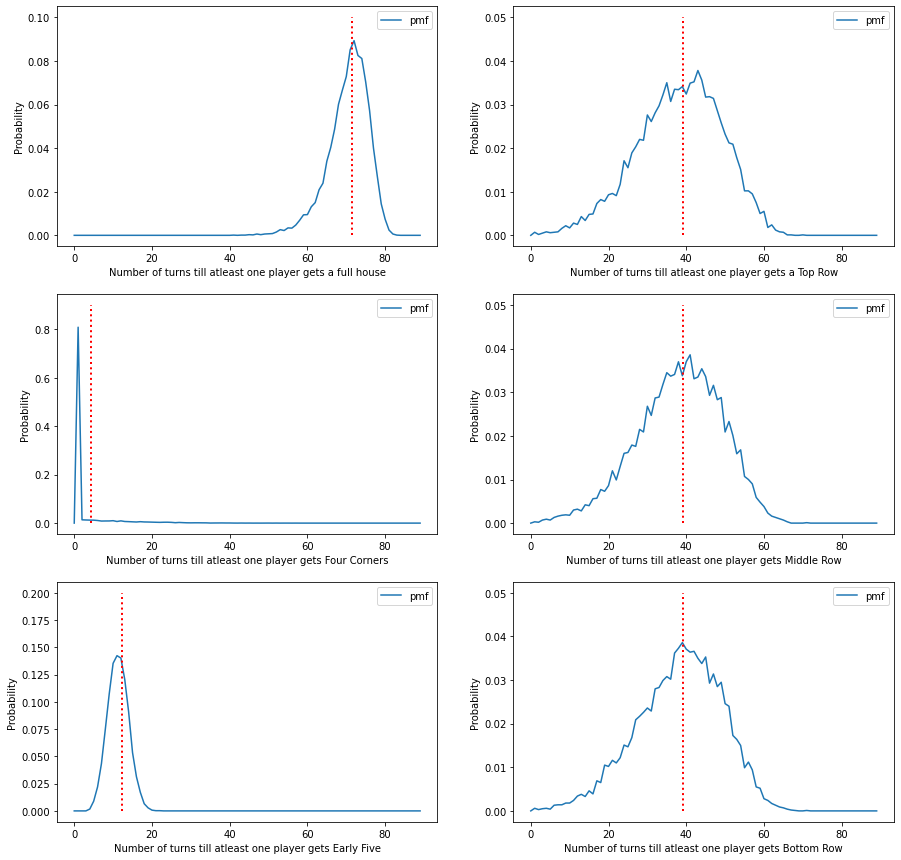

In [52]:
def plot_expectations(winningTurnDistribution):
    figure, axis = plt.subplots(3, 2)
    figure.set_size_inches(15, 15)
    axis[0, 0].plot(winningTurnDistribution[0], label='pmf')
    #axis[0, 0].plot(np.cumsum(winningTurnDistribution[0]), label='cdf')
    axis[0, 0].set_xlabel("Number of turns till atleast one player gets a full house")
    axis[0, 0].set_ylabel("Probability")
    axis[0, 0].legend()
    expec1 = np.average((np.arange(1,91)), weights=winningTurnDistribution[0])
    axis[0, 0].plot([expec1,expec1], [0, 0.1], 'r:', linewidth = 2.0)
    
    axis[0, 1].plot(winningTurnDistribution[1], label='pmf')
    #axis[0, 1].plot(np.cumsum(winningTurnDistribution[1]), label='cdf')
    axis[0, 1].set_xlabel("Number of turns till atleast one player gets a Top Row")
    axis[0, 1].set_ylabel("Probability")
    axis[0, 1].legend()
    expec2 = np.average((np.arange(1,91)), weights=winningTurnDistribution[1])
    axis[0, 1].plot([expec2,expec2], [0, 0.05], 'r:', linewidth = 2.0)
    
    axis[1, 0].plot(winningTurnDistribution[4], label='pmf')
    #axis[1, 0].plot(np.cumsum(winningTurnDistribution[4]), label='cdf')
    axis[1, 0].set_xlabel("Number of turns till atleast one player gets Four Corners")
    axis[1, 0].set_ylabel("Probability")
    axis[1, 0].legend()
    expec3 = np.average((np.arange(1,91)), weights=winningTurnDistribution[4])
    axis[1, 0].plot([expec3,expec3], [0, 0.9], 'r:', linewidth = 2.0)
    
    axis[1, 1].plot(winningTurnDistribution[2], label='pmf')
    #axis[1, 1].plot(np.cumsum(winningTurnDistribution[2]), label='cdf')
    axis[1, 1].set_xlabel("Number of turns till atleast one player gets Middle Row")
    axis[1, 1].set_ylabel("Probability")
    axis[1, 1].legend()
    expec4 = np.average((np.arange(1,91)), weights=winningTurnDistribution[2])
    axis[1, 1].plot([expec4,expec4], [0, 0.05], 'r:', linewidth = 2.0)
    
    axis[2, 0].plot(winningTurnDistribution[5], label='pmf')
    #axis[2, 0].plot(np.cumsum(winningTurnDistribution[5]), label='cdf')
    axis[2, 0].set_xlabel("Number of turns till atleast one player gets Early Five")
    axis[2, 0].set_ylabel("Probability")
    axis[2, 0].legend()
    expec5 = np.average((np.arange(1,91)), weights=winningTurnDistribution[5])
    axis[2, 0].plot([expec5,expec5], [0, 0.2], 'r:', linewidth = 2.0)
    
    axis[2, 1].plot(winningTurnDistribution[3], label='pmf')
    #axis[2, 1].plot(np.cumsum(winningTurnDistribution[3]), label='cdf')
    axis[2, 1].set_xlabel("Number of turns till atleast one player gets Bottom Row")
    axis[2, 1].set_ylabel("Probability")
    axis[2, 1].legend()
    expec6 = np.average((np.arange(1,91)), weights=winningTurnDistribution[3])
    axis[2, 1].plot([expec6,expec6], [0, 0.05], 'r:', linewidth = 2.0)
    
    plt.show()


def plot_ex_vs_players(winning_expectation):
    plt.figure(figsize=(10,8))
    for each in range(6):
        plt.plot(winning_expectation[each][1:90])
    plt.legend(['Full House','Top Line','Middle Line','Bottom Line','Four Corners','Early Five'])
    plt.xlabel('Number of players')
    plt.ylabel('Expected number of turns to win each type of strategy')
    plt.show()


plot_expectations(strategies_distribution)


In [ ]:
#winning expectation of 1 to 100 players, 100 iters
winning_expectation

In [ ]:
plt.plot(winningTurnDistribution[0])
plt.xlabel("Number turns to win full house")
plt.ylabel("Probability")
plt.show()

In [ ]:
plt.plot(winningTurnDistribution[1])
plt.xlabel("Number turns to four corners")
plt.ylabel("Probability")
plt.show()

In [ ]:
plt.plot(winningTurnDistribution[2])
plt.xlabel("Number turns to win bottom line")
plt.ylabel("Probability")
plt.show()

In [ ]:
plt.plot(winningTurnDistribution[3])
plt.xlabel("Number turns to win middle line")
plt.ylabel("Probability")
plt.show()

In [ ]:
plt.plot(winningTurnDistribution[4])
plt.xlabel("Number turns to win bottom line")
plt.ylabel("Probability")
plt.show()

In [ ]:
plt.plot(winningTurnDistribution[5])
plt.xlabel("Number of turns to win early five")
plt.ylabel("Probability")
plt.show()

In [ ]:
print(np.arange(1,5))